## Clustering single cell RNA data

K-means, heirarchical, and DBSCAN clustering is performed using already reduced scRNA-seq data (reduced by PCA in previous step of project)
There are 15 principle components.

In [23]:
#import libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#read in data
df = pd.read_csv('pca_15D_for_clustering.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-34.263721,24.064792,-5.101065,-0.460500,-6.622376,-4.714656,-3.075940,0.013755,-1.065345,-7.096563,1.249018,-4.156667,-0.048700,1.968508,0.932899,-4.001139
1,-27.765705,31.783110,-4.359556,0.514624,-6.828142,-5.774207,-3.431191,0.011174,-2.025553,-8.973419,1.853435,-3.308587,-0.112677,1.405580,1.025196,-3.962145
2,77.115082,74.686856,4.184727,8.011882,8.473116,-1.871679,-10.520424,-19.815585,-12.988809,16.962054,0.406363,12.721465,-5.503188,-0.144377,-8.227838,16.216910
3,97.330326,-4.313677,-13.812492,-4.560419,-7.400000,7.081327,-16.193277,-8.763991,16.956617,7.973902,-6.972559,-8.444666,-6.037023,23.306678,1.918988,-2.778039
4,40.141951,-7.417518,-8.108872,-5.897634,3.191487,-4.401413,5.609168,-20.557161,-1.258027,0.601448,3.288664,-2.221061,-5.386746,4.902101,-4.152384,-5.589127


In [24]:
# normalize data 
scaler = StandardScaler()  # Standardizes to zero mean and unit variance
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.752663,1.248355,-0.302363,-0.035228,-0.560878,-0.418880,-0.284528,0.001432,-0.128093,-0.941867,0.180004,-0.660323,-0.008071,0.339304,0.163220,-0.711652
1,-0.609922,1.648741,-0.258411,0.039368,-0.578306,-0.513017,-0.317389,0.001163,-0.243544,-1.190966,0.267110,-0.525598,-0.018673,0.242274,0.179368,-0.704717
2,1.693968,3.874363,0.248048,0.612902,0.717626,-0.166292,-0.973151,-2.062776,-1.561720,2.251230,0.058563,2.020918,-0.912010,-0.024886,-1.439544,2.884379
3,2.138032,-0.223771,-0.818729,-0.348868,-0.626739,0.629150,-1.497896,-0.912320,2.038793,1.058309,-1.004858,-1.341510,-1.000479,4.017278,0.335746,-0.494109
4,0.881788,-0.384782,-0.480649,-0.451164,0.270301,-0.391049,0.518854,-2.139973,-0.151260,0.079825,0.473949,-0.352835,-0.892713,0.844955,-0.726502,-0.994096


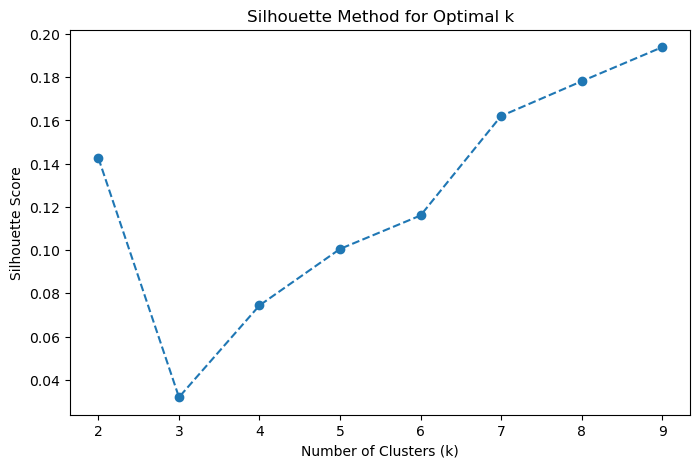

In [25]:
# calculate silhouette scores
silhouette_scores = []
k_values = range(2, 10)  # k from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()


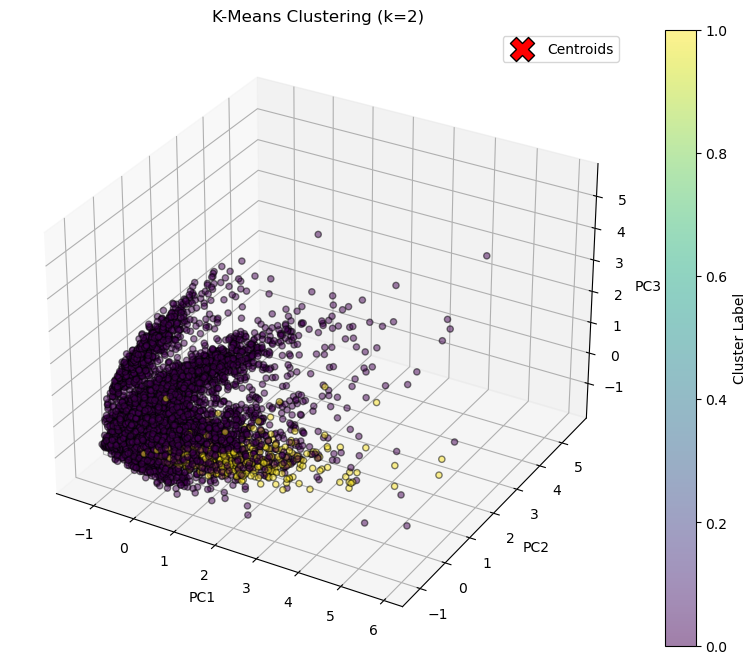

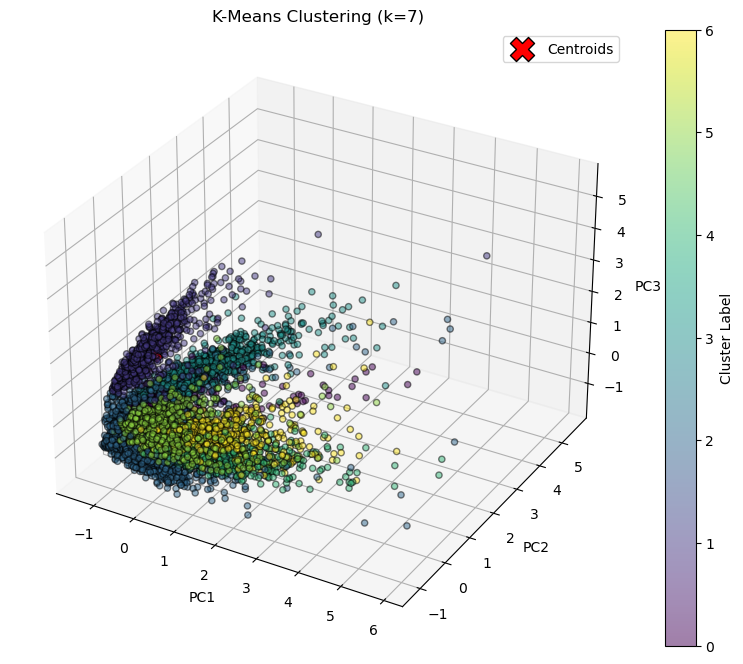

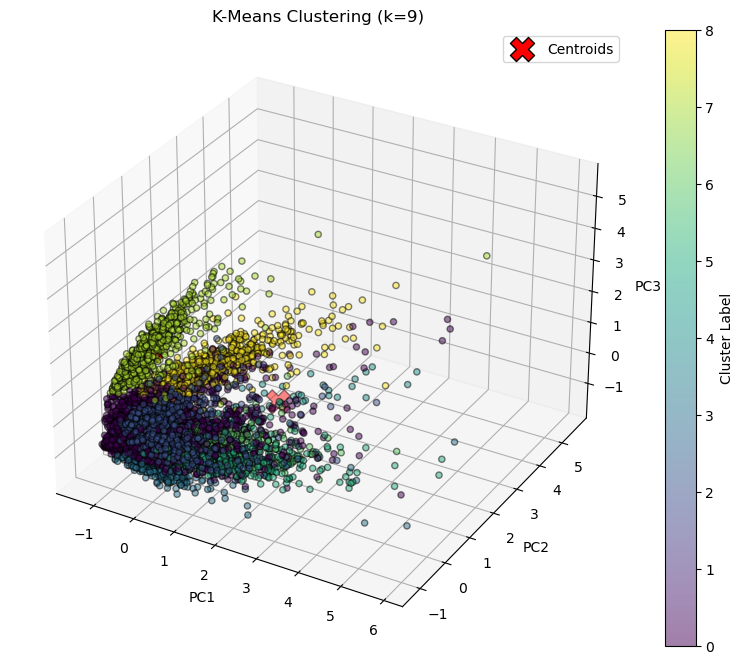

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Choose number of clusters based on Silhouette analysis
best_k_values = [2,7, 9]  # Adjust based on your Silhouette score results

for k in best_k_values:
    # Fit K-Means on PCA data
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df)  # Ensure df is PCA-transformed

    # Get cluster centers
    centroids = kmeans.cluster_centers_

    # Extract the first three principal components for visualization
    x, y, z = df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection='3d')

    # Plot data points
    scatter = ax.scatter(x, y, z, c=labels, cmap="viridis", edgecolor='k', s=20, alpha=0.5)

    # Plot centroids (black X markers)
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='red', s=300, marker='X', edgecolors='black', label='Centroids')

    # Labels and Title
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(f'K-Means Clustering (k={k})')

    # Show color bar for cluster labels
    plt.colorbar(scatter, label="Cluster Label")

    # Show the plot
    plt.legend()
    plt.show()


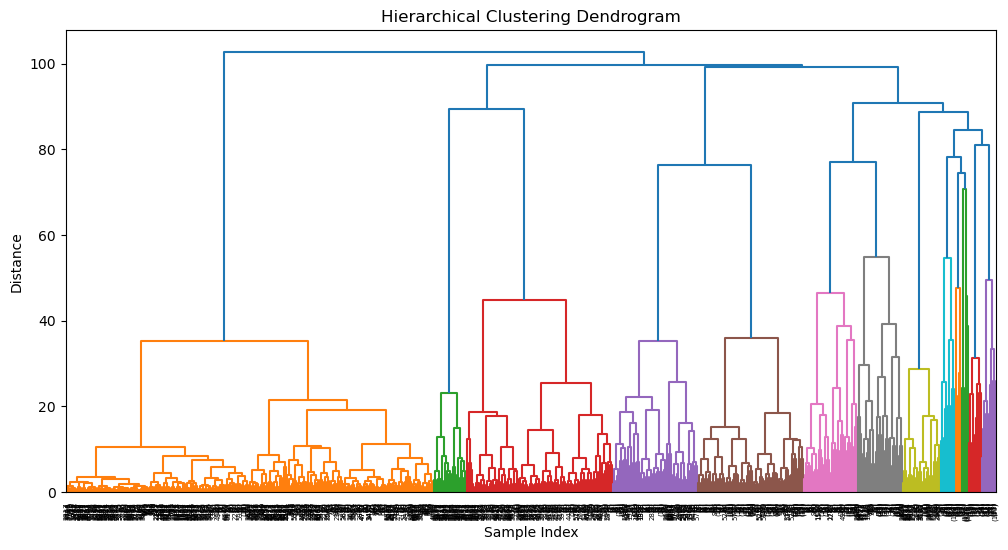

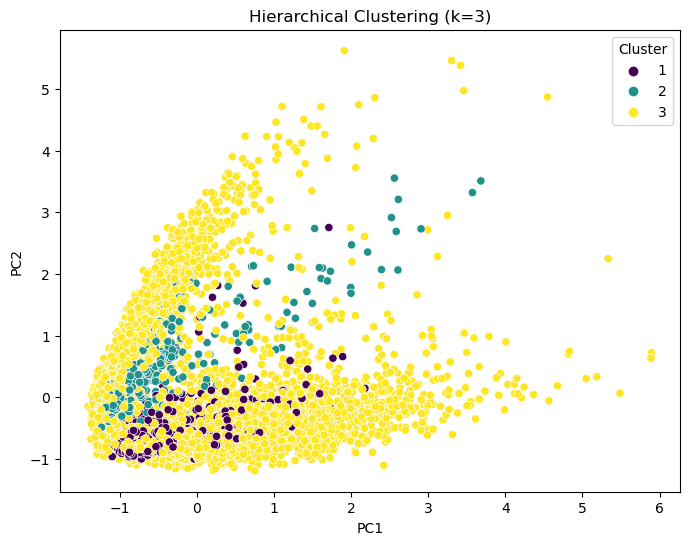

In [30]:
# Compute linkage matrix using Ward's method (minimizes variance within clusters)
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_matrix = linkage(df, method='ward')


# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)  # Truncate to keep it readable
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Choose number of clusters and extract labels (e.g., cutting the tree at 3 clusters)
num_clusters = 3
hierarchical_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to DataFrame
df_hierarchical = df.copy()
df_hierarchical['Cluster'] = hierarchical_labels

# Scatter plot with hierarchical clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_hierarchical.iloc[:, 0], y=df_hierarchical.iloc[:, 1], hue=df_hierarchical['Cluster'], palette='viridis')
plt.title(f"Hierarchical Clustering (k={num_clusters})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

Text(0, 0.5, 'Distance')

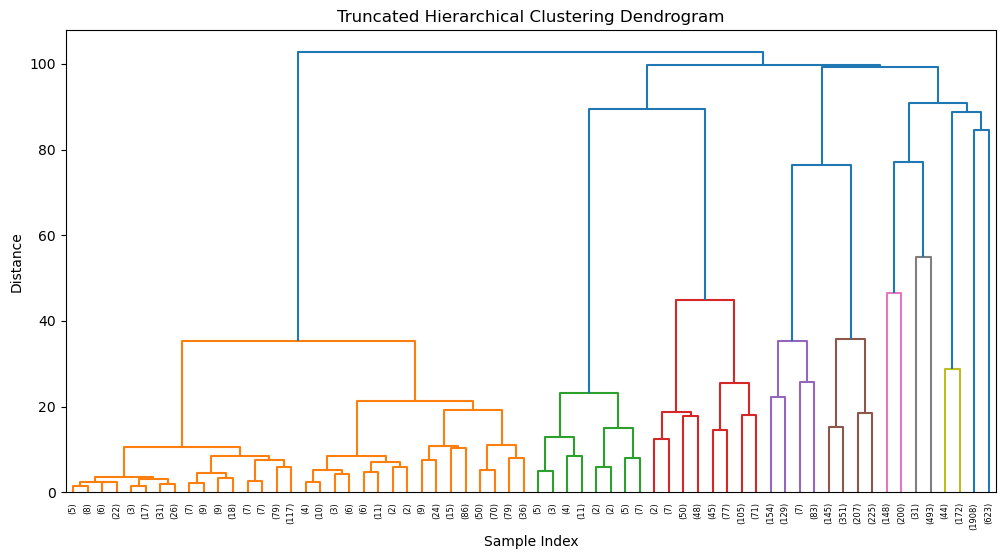

In [35]:
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # Show only the top 10 merging levels
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")

Estimated clusters: 5
Estimated noise points: 1412


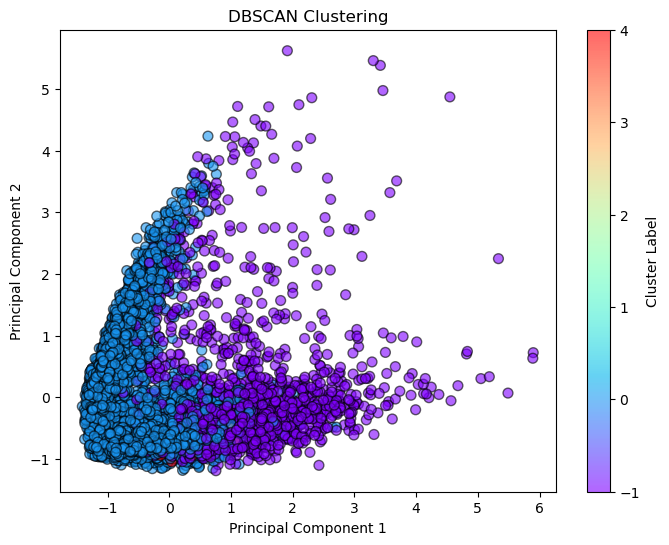

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune eps and min_samples!
dbscan_labels = dbscan.fit_predict(df)

# Count clusters (-1 means noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated clusters: {n_clusters}")
print(f"Estimated noise points: {n_noise}")

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_labels, cmap="rainbow", s=50, alpha=0.6, edgecolors="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering")
plt.colorbar(label="Cluster Label")
plt.show()
